### Solving Duffing Equation for Coupled Masses Using Time Integration
If we assume non-linear spring behavior defined by the duffing equation, we can formulate 2 separate equations for both the masses $m_1$ and $m_2$. For the first mass we can write:

$$
m_1\ddot{x}_1 = -\delta_1\dot{x}_1 - \alpha_1x_1 - \beta_1{x_1}^3 + \delta_2(\dot{x}_2-\dot{x}_1) + \alpha_2(x_2 - x_1) + \beta_2(x_2 - x_1)^3
$$

Similarly, for the second mass we can write (assuming the free hanging mass is the only one that is forced)

$$
m_2\ddot{x}_2 = \gamma cos(\omega t) - \delta_2(\dot{x}_2-\dot{x}_1) - \alpha_2(x_2 - x_1) - \beta_2(x_2 - x_1)^3
$$

Let's start by first importing the libraries before we break these equations down

### Import the Libraries

In [1]:
using DifferentialEquations
using Plots

### Breaking Down into First-Order ODEs

To numerically simulate this system, we must convert the second-order ODEs into a system of first-order ODEs by introducing new variables for the positions and velocities of the masses. Let:

$$
x_1 = z_1, \dot{x}_1 = z_2
$$
$$
x_2 = z_3, \dot{x}_2 = z_4
$$

Thus, the second-order derivatives $\ddot{x}_1$ and $\ddot{x}_2$ become $\dot{z}_2$ and $\dot{z}_4$ respectively.

#### First Mass $m_1$:

The equation for the first mass $m_1$ is:

$$
m_1\ddot{x}_1 = -\delta_1\dot{x}_1 - \alpha_1x_1 - \beta_1{x_1}^3 + \delta_2(\dot{x}_2-\dot{x}_1) + \alpha_2(x_2 - x_1) + \beta_2(x_2 - x_1)^3
$$

Substituting the new variables:

$$
m_1 \dot{z}_2 = -\delta_1 z_2 - \alpha_1 z_1 - \beta_1 z_1^3 + \delta_2(z_4 - z_2) + \alpha_2(z_3 - z_1) + \beta_2(z_3 - z_1)^3
$$

#### Second Mass $m_2$:

The equation for the second mass $m_2$ is:

$$
m_2\ddot{x}_2 = \gamma \cos(\omega t) - \delta_2(\dot{x}_2-\dot{x}_1) - \alpha_2(x_2 - x_1) - \beta_2(x_2 - x_1)^3
$$

Substituting the new variables:

$$
m_2 \dot{z}_4 = \gamma \cos(\omega t) - \delta_2(z_4 - z_2) - \alpha_2(z_3 - z_1) - \beta_2(z_3 - z_1)^3
$$

### System of First-Order ODEs

The system of first-order ODEs becomes:

1. $\dot{z}_1 = z_2$
2. $\dot{z}_2 = \frac{-\delta_1 z_2 - \alpha_1 z_1 - \beta_1 z_1^3 + \delta_2(z_4 - z_2) + \alpha_2(z_3 - z_1) + \beta_2(z_3 - z_1)^3}{m_1}$
3. $\dot{z}_3 = z_4$
4. $\dot{z}_4 = \frac{\gamma \cos(\omega t) - \delta_2(z_4 - z_2) - \alpha_2(z_3 - z_1) - \beta_2(z_3 - z_1)^3}{m_2}$


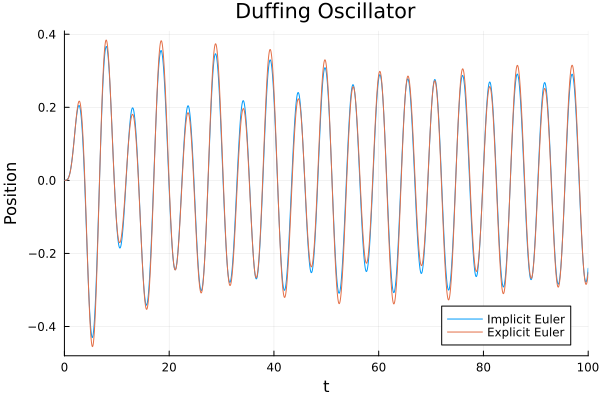

In [5]:
#Define the duffing equation for the system of ODEs
function duffing(du, u, p, t)
    alpha1, alpha2, delta1, delta2, beta1, beta2, gamma, omega, m1, m2 = p
    du[1] = u[2]
    du[2] = (1/m1)*(-delta1*u[2] - alpha1*u[1] - beta1*u[1]^3 + delta2*(u[4] - u[2]) + alpha2*(u[3] - u[1]) + beta2*(u[3] - u[1])^3)
    du[3] = u[4]
    du[4] = (1/m2)*(-delta2*(u[4] - u[2]) - alpha2*(u[3] - u[1]) - beta2*(u[3] - u[1])^3 + gamma*cos(omega*t))
end

#Setting up the parameters for the system
alpha1 = 1.0
alpha2 = 1.0
delta1 = 0.1
delta2 = 0.1
beta1 = 1.0
beta2 = 1.0
gamma = 0.37
omega = 1.2
m1 = 1.0
m2 = 1.0

p = [alpha1, alpha2, delta1, delta2, beta1, beta2, gamma, omega, m1, m2]

#Define the initial conditions
u0 = [0.0, 0.0, 0.0, 0.0]

#Define the time span
tspan = (0.0, 100.0)
dt = 0.01

#Solve the ODEs
prob = ODEProblem(duffing, u0, tspan, p)
sol1 = solve(prob, ImplicitEuler(), dt=dt) #Implicit Euler method
sol2 = solve(prob, Euler(), dt=dt) #Explicit Euler method

#Plot the results for the first mass
plot(sol1, vars=(0, 1), label="Implicit Euler", xlabel="Time", ylabel="Position", title="Duffing Oscillator")
plot!(sol2, vars=(0, 1), label="Explicit Euler")